In [158]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Importing libraries
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# import gensim

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
nltk.download('all')
#nltk.download('punkt')
#nltk.download('stopwords')


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_dat

In [159]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
new_stops=["tablet",'amazon','thing','hd','app','year','apps','store','google']
for i in new_stops:
    stopwords.append(i)

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 188 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [160]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tokenization_and_lemmatization(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string
    #将所有stopwords(无意义)的词语删除
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    #将所有数字删除
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    
    tags = pos_tag(filtered_tokens) # 获取单词词性
    wnl = WordNetLemmatizer()
    lemmatization = []
    
    #lemmatization
    for tag in tags:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmatization.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) # 词形还原
    
    return lemmatization

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
link = 'https://drive.google.com/open?id=1-1lF0pNoAu7vclx2K0i8RNamLvhQ7LEk'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('test_final_df.csv') 
full_df  = pd.read_csv('test_final_df.csv')
full_df.shape


GoogleDriveFile({'id': '1-1lF0pNoAu7vclx2K0i8RNamLvhQ7LEk'})


(36155, 27)

In [163]:
# import topic weight data
link = 'https://drive.google.com/open?id=1KmrNg301N6NEeOXMu5Z8NPVXLdZgcZZA'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('topic_weight_df.csv') 
topic_weight_df  = pd.read_csv('topic_weight_df.csv')
topic_weight_df.shape


GoogleDriveFile({'id': '1KmrNg301N6NEeOXMu5Z8NPVXLdZgcZZA'})


(8, 21)

In [164]:
# import key words of 14 topics
link = 'https://drive.google.com/open?id=1-6R_TtXSfbtdd57BPHQTUbw3l4scKFXg'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('keyword_df.csv') 
keyword_df  = pd.read_csv('keyword_df.csv')
keyword_df.shape

GoogleDriveFile({'id': '1-6R_TtXSfbtdd57BPHQTUbw3l4scKFXg'})


(8, 59)

In [165]:
full_df.shape

(36155, 27)

In [166]:
full_df.head()

,Unnamed: 0,Stars,Sentiment,Subject,Subject_Length,Date,Web_Scrape_Date,Day_length,Verified Purchase,Text body,...,Rank,Imortance_3,Importance_5,Document,Topic0,Topic1,Topic2,Topic3,topic,new_topic
0,3011,5,1,Fire HD 10 Tablet,17,2022/5/9,2022/10/27,171,1,I really enjoy my Fire HD 10. I can watch my f...,...,3075,NaN,2,Doc3011,0.25,0.25,0.25,0.25,4,Good4
1,18204,4,1,hd plus 3g is a better machine because of the...,57,2021/1/2,2022/10/27,663,1,same as above,...,3846,NaN,2,Doc18204,0.25,0.25,0.25,0.25,4,Good4
2,9245,5,1,My boys ages 5 and 10 love them!,32,2022/1/11,2022/10/27,289,1,We have only had them for a couple weeks but t...,...,1115,NaN,1,Doc9245,0.25,0.25,0.25,0.25,4,Good4
3,33692,4,1,For the most part I like it quite well,38,2018/1/25,2022/10/27,1736,1,For the most part I like it quite well. The o...,...,3924,NaN,2,Doc33692,0.62,0.13,0.13,0.13,0,Good0
4,37351,4,1,I like that the tablet was fast,31,2018/1/29,2022/10/27,1732,1,I like that the tablet was fast. I bought 3 an...,...,4158,NaN,1,Doc37351,0.25,0.25,0.25,0.25,4,Good4


In [167]:
full_final = full_df.loc[:, ['Subject_Length', 'Day_length', 'Verified Purchase', 'Subject+Text_body', 'Text_body_Length',
                             'Number of helpful', 'Include video/picture or not', 'Price', 'new_topic']] 

In [168]:
full_final.loc[full_final['Price'] == 'Unknown', 'Price'] = 87.5

In [169]:
full_final

,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic
0,17,171,1,Fire HD 10 Tablet I really enjoy my Fire HD 10...,189,0,0,149.99,Good4
1,57,663,1,hd plus 3g is a better machine because of the...,13,0,0,54.99,Good4
2,32,289,1,My boys ages 5 and 10 love them! We have only ...,498,9,0,139.99,Good4
3,38,1736,1,For the most part I like it quite well For the...,283,0,0,87.5,Good0
4,31,1732,1,I like that the tablet was fast I like that th...,186,1,0,87.5,Good4
...,...,...,...,...,...,...,...,...,...
36150,9,86,1,good deal Does everything you would expect a F...,66,0,0,219.99,Good4
36151,12,471,1,Great Tablet Purchased the tablet for my grand...,204,0,0,119.99,Good4
36152,10,469,1,I love it! I have had 5 or 6 Kindles and since...,1264,1,0,149.99,Good1
36153,21,35,1,Battery life improved Satisfied,9,0,0,149.99,Good3


In [170]:
full_final['Subject+Text_body_new'] = full_final['Subject+Text_body'].apply(lambda x: tokenization_and_lemmatization(x))

In [171]:
full_final

,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_new
0,17,171,1,Fire HD 10 Tablet I really enjoy my Fire HD 10...,189,0,0,149.99,Good4,"[fire, really, enjoy, fire, watch, favorite, m..."
1,57,663,1,hd plus 3g is a better machine because of the...,13,0,0,54.99,Good4,"[plus, good, machine, large, ram]"
2,32,289,1,My boys ages 5 and 10 love them! We have only ...,498,9,0,139.99,Good4,"[boy, age, love, couple, week, quite, bit, use..."
3,38,1736,1,For the most part I like it quite well For the...,283,0,0,87.5,Good0,"[part, like, quite, well, part, like, quite, w..."
4,31,1732,1,I like that the tablet was fast I like that th...,186,1,0,87.5,Good4,"[like, fast, like, fast, buy, one, slow, freez..."
...,...,...,...,...,...,...,...,...,...,...
36150,9,86,1,good deal Does everything you would expect a F...,66,0,0,219.99,Good4,"[good, deal, everything, would, expect, fire, ..."
36151,12,471,1,Great Tablet Purchased the tablet for my grand...,204,0,0,119.99,Good4,"[great, purchase, granddaughter, love, even, n..."
36152,10,469,1,I love it! I have had 5 or 6 Kindles and since...,1264,1,0,149.99,Good1,"[love, kindles, since, day, get, first, one, l..."
36153,21,35,1,Battery life improved Satisfied,9,0,0,149.99,Good3,"[battery, life, improve, satisfied]"


In [173]:
Texts = full_final['Subject+Text_body']

In [174]:
Texts

0        Fire HD 10 Tablet I really enjoy my Fire HD 10...
1        hd plus 3g  is a better machine because of the...
2        My boys ages 5 and 10 love them! We have only ...
3        For the most part I like it quite well For the...
4        I like that the tablet was fast I like that th...
                               ...                        
36150    good deal Does everything you would expect a F...
36151    Great Tablet Purchased the tablet for my grand...
36152    I love it! I have had 5 or 6 Kindles and since...
36153                      Battery life improved Satisfied
36154    Could not add my aunt‚Äôs email - Got a lot of...
Name: Subject+Text_body, Length: 36155, dtype: object

In [ ]:
full_list = full_final['Subject+Text_body_new'].to_list()

In [ ]:
element = []
for i in full_final['Subject+Text_body_new']:
  element.append(len(i))

In [ ]:
full_final['Number of words'] = element
full_final

,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_new,Number of words
0,17,171,1,Fire HD 10 Tablet I really enjoy my Fire HD 10...,189,0,0,149.99,Good4,"[fire, really, enjoy, fire, watch, favorite, m...",18
1,57,663,1,hd plus 3g is a better machine because of the...,13,0,0,54.99,Good4,"[plus, good, machine, large, ram]",5
2,32,289,1,My boys ages 5 and 10 love them! We have only ...,498,9,0,139.99,Good4,"[boy, age, love, couple, week, quite, bit, use...",39
3,38,1736,1,For the most part I like it quite well For the...,283,0,0,87.5,Good0,"[part, like, quite, well, part, like, quite, w...",28
4,31,1732,1,I like that the tablet was fast I like that th...,186,1,0,87.5,Good4,"[like, fast, like, fast, buy, one, slow, freez...",18
...,...,...,...,...,...,...,...,...,...,...,...
36150,9,86,1,good deal Does everything you would expect a F...,66,0,0,219.99,Good4,"[good, deal, everything, would, expect, fire, ...",7
36151,12,471,1,Great Tablet Purchased the tablet for my grand...,204,0,0,119.99,Good4,"[great, purchase, granddaughter, love, even, n...",14
36152,10,469,1,I love it! I have had 5 or 6 Kindles and since...,1264,1,0,149.99,Good1,"[love, kindles, since, day, get, first, one, l...",112
36153,21,35,1,Battery life improved Satisfied,9,0,0,149.99,Good3,"[battery, life, improve, satisfied]",4


In [ ]:
# We only consider the documents with more than 2 words
full_final = full_final[full_final['Number of words'] > 2]
full_final = full_final.reset_index()
full_final

,index,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_new,Number of words
0,0,17,171,1,Fire HD 10 Tablet I really enjoy my Fire HD 10...,189,0,0,149.99,Good4,"[fire, really, enjoy, fire, watch, favorite, m...",18
1,1,57,663,1,hd plus 3g is a better machine because of the...,13,0,0,54.99,Good4,"[plus, good, machine, large, ram]",5
2,2,32,289,1,My boys ages 5 and 10 love them! We have only ...,498,9,0,139.99,Good4,"[boy, age, love, couple, week, quite, bit, use...",39
3,3,38,1736,1,For the most part I like it quite well For the...,283,0,0,87.5,Good0,"[part, like, quite, well, part, like, quite, w...",28
4,4,31,1732,1,I like that the tablet was fast I like that th...,186,1,0,87.5,Good4,"[like, fast, like, fast, buy, one, slow, freez...",18
...,...,...,...,...,...,...,...,...,...,...,...,...
35525,36150,9,86,1,good deal Does everything you would expect a F...,66,0,0,219.99,Good4,"[good, deal, everything, would, expect, fire, ...",7
35526,36151,12,471,1,Great Tablet Purchased the tablet for my grand...,204,0,0,119.99,Good4,"[great, purchase, granddaughter, love, even, n...",14
35527,36152,10,469,1,I love it! I have had 5 or 6 Kindles and since...,1264,1,0,149.99,Good1,"[love, kindles, since, day, get, first, one, l...",112
35528,36153,21,35,1,Battery life improved Satisfied,9,0,0,149.99,Good3,"[battery, life, improve, satisfied]",4


In [ ]:
def joinListWord(list):
  outString = ' '.join(list)
  return outString

In [ ]:
full_final['Subject+Text_body_join'] = full_final['Subject+Text_body_new'].apply(lambda x: joinListWord(x))

In [ ]:
full_final.drop(['Subject+Text_body', 'Subject+Text_body_new', 'Number of words', 'index'], axis=1, inplace=True)
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_join
0,17,171,1,189,0,0,149.99,Good4,fire really enjoy fire watch favorite movie hu...
1,57,663,1,13,0,0,54.99,Good4,plus good machine large ram
2,32,289,1,498,9,0,139.99,Good4,boy age love couple week quite bit use come ga...
3,38,1736,1,283,0,0,87.5,Good0,part like quite well part like quite well disl...
4,31,1732,1,186,1,0,87.5,Good4,like fast like fast buy one slow freezing take...
...,...,...,...,...,...,...,...,...,...
35525,9,86,1,66,0,0,219.99,Good4,good deal everything would expect fire faster
35526,12,471,1,204,0,0,119.99,Good4,great purchase granddaughter love even niece i...
35527,10,469,1,1264,1,0,149.99,Good1,love kindles since day get first one love back...
35528,21,35,1,9,0,0,149.99,Good3,battery life improve satisfied


In [ ]:
full_final = full_final.drop(16493)
full_final = full_final.reset_index()

In [ ]:
index_list = list(full_final.index)
len(index_list)

35529

In [ ]:
def get_tfdict(doc):
  feature_name = []
  tf_dict = {}
  cv = CountVectorizer(ngram_range = (2,3))
  cv_fit=cv.fit_transform([doc])
  feature_name = cv.get_feature_names()
  tf_list = list(cv_fit.toarray().flatten())
  tf_dict = dict(zip(feature_name,tf_list))
  return tf_dict

In [ ]:
tf_all = []
#try:
for i in range(len(index_list)):
  tf_all.append(get_tfdict(full_final['Subject+Text_body_join'][i]))
#except:
   # pass

In [ ]:
get_tfdict(full_final['Subject+Text_body_join'][16493])

{'awesome happy': 1,
 'awesome happy graphic': 1,
 'graphic super': 1,
 'happy graphic': 1,
 'happy graphic super': 1}

In [ ]:
A = full_final['Subject+Text_body_join'][16493]

In [ ]:
tokenization_and_lemmatization(A)

['awesome', 'happy', 'graphic', 'super']

In [ ]:
get_tfdict(full_final['Subject+Text_body_join'][16492])

{'connect wifi': 1,
 'connect wifi slow': 1,
 'end return': 1,
 'return would': 1,
 'return would stay': 1,
 'slow end': 1,
 'slow end return': 1,
 'stay connect': 1,
 'stay connect wifi': 1,
 'wifi slow': 1,
 'wifi slow end': 1,
 'would stay': 1,
 'would stay connect': 1}

In [ ]:
tf_all

[{'also enjoy': 1,
  'also enjoy read': 1,
  'disney plus': 1,
  'disney plus also': 1,
  'enjoy fire': 1,
  'enjoy fire watch': 1,
  'enjoy read': 1,
  'enjoy read fire': 1,
  'favorite movie': 1,
  'favorite movie hulu': 1,
  'fire really': 1,
  'fire really enjoy': 1,
  'fire watch': 1,
  'fire watch favorite': 1,
  'fire would': 1,
  'fire would recommend': 1,
  'friend family': 1,
  'hulu disney': 1,
  'hulu disney plus': 1,
  'movie hulu': 1,
  'movie hulu disney': 1,
  'plus also': 1,
  'plus also enjoy': 1,
  'read fire': 1,
  'read fire would': 1,
  'really enjoy': 1,
  'really enjoy fire': 1,
  'recommend friend': 1,
  'recommend friend family': 1,
  'watch favorite': 1,
  'watch favorite movie': 1,
  'would recommend': 1,
  'would recommend friend': 1},
 {'good machine': 1,
  'good machine large': 1,
  'large ram': 1,
  'machine large': 1,
  'machine large ram': 1,
  'plus good': 1,
  'plus good machine': 1},
 {'account seem': 1,
  'account seem sturdy': 1,
  'age love': 1,


In [ ]:
full_final

,index,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_join
0,0,17,171,1,189,0,0,149.99,Good4,fire really enjoy fire watch favorite movie hu...
1,1,57,663,1,13,0,0,54.99,Good4,plus good machine large ram
2,2,32,289,1,498,9,0,139.99,Good4,boy age love couple week quite bit use come ga...
3,3,38,1736,1,283,0,0,87.5,Good0,part like quite well part like quite well disl...
4,4,31,1732,1,186,1,0,87.5,Good4,like fast like fast buy one slow freezing take...
...,...,...,...,...,...,...,...,...,...,...
35524,35525,9,86,1,66,0,0,219.99,Good4,good deal everything would expect fire faster
35525,35526,12,471,1,204,0,0,119.99,Good4,great purchase granddaughter love even niece i...
35526,35527,10,469,1,1264,1,0,149.99,Good1,love kindles since day get first one love back...
35527,35528,21,35,1,9,0,0,149.99,Good3,battery life improve satisfied


In [ ]:
len(tf_all)

35529

In [ ]:
len(index_list)

35529

In [ ]:
tf_dict = {}
tf_dict = dict(zip(index_list, tf_all))
tf_dict

{0: {'also enjoy': 1,
  'also enjoy read': 1,
  'disney plus': 1,
  'disney plus also': 1,
  'enjoy fire': 1,
  'enjoy fire watch': 1,
  'enjoy read': 1,
  'enjoy read fire': 1,
  'favorite movie': 1,
  'favorite movie hulu': 1,
  'fire really': 1,
  'fire really enjoy': 1,
  'fire watch': 1,
  'fire watch favorite': 1,
  'fire would': 1,
  'fire would recommend': 1,
  'friend family': 1,
  'hulu disney': 1,
  'hulu disney plus': 1,
  'movie hulu': 1,
  'movie hulu disney': 1,
  'plus also': 1,
  'plus also enjoy': 1,
  'read fire': 1,
  'read fire would': 1,
  'really enjoy': 1,
  'really enjoy fire': 1,
  'recommend friend': 1,
  'recommend friend family': 1,
  'watch favorite': 1,
  'watch favorite movie': 1,
  'would recommend': 1,
  'would recommend friend': 1},
 1: {'good machine': 1,
  'good machine large': 1,
  'large ram': 1,
  'machine large': 1,
  'machine large ram': 1,
  'plus good': 1,
  'plus good machine': 1},
 2: {'account seem': 1,
  'account seem sturdy': 1,
  'age l

In [ ]:
len(tf_dict.keys())

35529

In [ ]:
keyword_df.drop("Unnamed: 0",axis=1, inplace = True)

In [ ]:
keyword_df.shape

(8, 58)

In [ ]:
keyword_df

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 48,Word 49,Word 50,Word 51,Word 52,Word 53,Word 54,Word 55,Word 56,Word 57
0,battery life,customer service,old kindle,parental control,watch movie,stop charge,watch video,prime day,long time,easy use,...,power button,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,home screen,charge port,read book,work great,new kindle,brand new,want use,feel like,factory reset,make sure,...,able use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,touch screen,play game,work fine,buy new,lock screen,user friendly,ca use,tech support,kindle book,use kindle,...,hold charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sd card,stop work,waste money,hold charge,screen quality,use kindle,year ago,prime video,really like,use device,...,user friendly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,battery life,easy use,highly recommend,great value,kid love,parental control,long time,use read,absolutely love,happy purchase,...,old love,love new,daughter love,love kindle,great product,son love,old kindle,work fine,far good,good product
5,read book,screen quality,watch movie,touch screen,like new,sd card,good price,love kindle,great kid,easy set,...,good quality,life good,love love,customer service,battery life good,great product,good product,far good,brand new,great great
6,work great,love love,prime day,love new,large screen,work fine,brand new,far good,watch video,screen protector,...,parental control,son love,good battery,old love,daughter love,great product,great battery life,life good,good quality,battery life good
7,great product,great price,play game,really like,old kindle,great buy,daughter love,new kindle,son love,good quality,...,great kid,work fine,love love,long battery,screen size,brand new,good battery,life great,far good,life good


In [ ]:
keyword_df = keyword_df.iloc[:,:20]
keyword_df

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
0,battery life,customer service,old kindle,parental control,watch movie,stop charge,watch video,prime day,long time,easy use,look like,buy kindle,save money,new kindle,read book,screen quality,prime video,year ago,pretty good,charge port
1,home screen,charge port,read book,work great,new kindle,brand new,want use,feel like,factory reset,make sure,kid profile,silk browser,year old,use read,parental control,use kindle,old kindle,watch video,buy kindle,customer service
2,touch screen,play game,work fine,buy new,lock screen,user friendly,ca use,tech support,kindle book,use kindle,watch movie,buy kindle,watch video,new kindle,factory reset,use read,battery life,home screen,easy use,customer service
3,sd card,stop work,waste money,hold charge,screen quality,use kindle,year ago,prime video,really like,use device,power button,able use,pretty good,battery life,want use,buy kindle,new kindle,watch movie,prime day,watch video
4,battery life,easy use,highly recommend,great value,kid love,parental control,long time,use read,absolutely love,happy purchase,great battery,pretty good,good battery,life great,battery life great,great battery life,life good,battery life good,screen quality,quality great
5,read book,screen quality,watch movie,touch screen,like new,sd card,good price,love kindle,great kid,easy set,big screen,use kindle,old love,long battery,great screen,play game,battery life,use read,quality great,long time
6,work great,love love,prime day,love new,large screen,work fine,brand new,far good,watch video,screen protector,screen size,great great,kindle book,price great,new kindle,happy purchase,play game,battery life,use read,pretty good
7,great product,great price,play game,really like,old kindle,great buy,daughter love,new kindle,son love,good quality,good product,customer service,quality great,great deal,price great,battery life,use read,highly recommend,screen quality,great great


In [ ]:
topic_weight_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
topic_weight_df

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
0,0.279352,0.153583,0.070632,0.065424,0.057475,0.052819,0.050551,0.049161,0.045765,0.043381,0.042426,0.041161,0.040500,0.004001,0.000109,0.000109,0.000108,0.000108,0.000108,0.000108
1,0.113151,0.110574,0.105451,0.084079,0.074681,0.071592,0.070860,0.067328,0.055192,0.054129,0.051764,0.048990,0.044580,0.043167,0.000345,0.000123,0.000122,0.000122,0.000122,0.000122
2,0.166746,0.166108,0.140443,0.116690,0.100088,0.093459,0.072190,0.069483,0.067236,0.001103,0.000169,0.000167,0.000167,0.000167,0.000167,0.000166,0.000166,0.000166,0.000166,0.000166
3,0.162899,0.125294,0.122440,0.105136,0.061876,0.060581,0.056910,0.053289,0.053283,0.051622,0.049913,0.048820,0.043114,0.000210,0.000133,0.000133,0.000133,0.000132,0.000132,0.000132
4,0.235401,0.149604,0.064144,0.060460,0.054088,0.048979,0.044567,0.043500,0.042273,0.037497,0.031723,0.031256,0.029049,0.027781,0.027482,0.024723,0.023514,0.022522,0.000257,0.000189
5,0.102185,0.093854,0.089157,0.084607,0.070893,0.069106,0.061428,0.058972,0.057383,0.057191,0.054915,0.047021,0.044152,0.035870,0.034200,0.026989,0.010646,0.000175,0.000033,0.000030
6,0.193391,0.085072,0.077086,0.072047,0.067390,0.064809,0.064556,0.062088,0.059554,0.053759,0.051398,0.051082,0.049721,0.027468,0.018945,0.000053,0.000038,0.000036,0.000036,0.000035
7,0.126631,0.120678,0.097188,0.088467,0.068739,0.066868,0.062281,0.057202,0.056485,0.054085,0.052021,0.047694,0.041779,0.041546,0.016858,0.000033,0.000032,0.000032,0.000032,0.000032


In [ ]:
matrix_weight = topic_weight_df.to_numpy()

In [ ]:
matrix_weight.shape

(8, 20)

In [ ]:
matrix_df = keyword_df.to_numpy()

In [ ]:
matrix_df

array([['battery life', 'customer service', 'old kindle',
        'parental control', 'watch movie', 'stop charge', 'watch video',
        'prime day', 'long time', 'easy use', 'look like', 'buy kindle',
        'save money', 'new kindle', 'read book', 'screen quality',
        'prime video', 'year ago', 'pretty good', 'charge port'],
       ['home screen', 'charge port', 'read book', 'work great',
        'new kindle', 'brand new', 'want use', 'feel like',
        'factory reset', 'make sure', 'kid profile', 'silk browser',
        'year old', 'use read', 'parental control', 'use kindle',
        'old kindle', 'watch video', 'buy kindle', 'customer service'],
       ['touch screen', 'play game', 'work fine', 'buy new',
        'lock screen', 'user friendly', 'ca use', 'tech support',
        'kindle book', 'use kindle', 'watch movie', 'buy kindle',
        'watch video', 'new kindle', 'factory reset', 'use read',
        'battery life', 'home screen', 'easy use', 'customer service'],


In [ ]:
newDict = {}
for id in tf_dict.keys():  # Get doc ID
  newDict.update({id : {}})
  docMap = tf_dict.get(id)
  for i in range(len(matrix_df)): # each topic
    scoreThisLine = 0
    for j in range(len(matrix_df[0])): # each unique word for each topic    # assign different weights for different unique words according to their rank of importance
      cellValue = docMap.get(matrix_df[i][j])
      if cellValue == None:
        cellValue = 0
      scoreThisLine = scoreThisLine + cellValue * matrix_weight[i][j]
#      scoreThisLine = np.round(scoreThisLine, 2)
    newDict.get(id).update({i : scoreThisLine})

In [ ]:
# newDict = {}
# for id in tf_dict.keys():  # Get doc ID
#   newDict.update({id : {}})
#   docMap = tf_dict.get(id)
#   for i in range(len(matrix_df)): # each topic
#     scoreThisLine = 0
#     for j in range(len(matrix_df[0])): # each unique word for each topic
#       weight = 0.5/53                  # assign different weights for different unique words according to their rank of importance
#       if j == 0:
#         weight = 0.18
#       elif j == 1:
#         weight = 0.14
#       elif j == 2:
#         weight = 0.10
#       elif j == 3:
#         weight = 0.06
#       elif j == 4:
#         weight = 0.02
#       cellValue = docMap.get(matrix_df[i][j])
#       if cellValue == None:
#         cellValue = 0
#       scoreThisLine = scoreThisLine + cellValue * weight
#       scoreThisLine = np.round(scoreThisLine, 2)

#     newDict.get(id).update({i : scoreThisLine})

In [ ]:
newDict

{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 1: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 2: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 3: {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0673902020757418,
  7: 0.0},
 4: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 5: {0: 0.0,
  1: 0.0,
  2: 0.1404430244687737,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0648089777948992,
  7: 0.0},
 6: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 7: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 8: {0: 0.0,
  1: 0.0445797884500471,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 9: {0: 0.0433814380171313,
  1: 0.0,
  2: 0.0001659038983297,
  3: 0.0,
  4: 0.1496036630742232,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 10: {0: 0.0,
  1: 0.0,
  2: 0.1166902656408073,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 11: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4

In [ ]:
len(newDict)

35529

In [ ]:
full_final

,index,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_join
0,0,17,171,1,189,0,0,149.99,Good4,fire really enjoy fire watch favorite movie hu...
1,1,57,663,1,13,0,0,54.99,Good4,plus good machine large ram
2,2,32,289,1,498,9,0,139.99,Good4,boy age love couple week quite bit use come ga...
3,3,38,1736,1,283,0,0,87.5,Good0,part like quite well part like quite well disl...
4,4,31,1732,1,186,1,0,87.5,Good4,like fast like fast buy one slow freezing take...
...,...,...,...,...,...,...,...,...,...,...
35524,35525,9,86,1,66,0,0,219.99,Good4,good deal everything would expect fire faster
35525,35526,12,471,1,204,0,0,119.99,Good4,great purchase granddaughter love even niece i...
35526,35527,10,469,1,1264,1,0,149.99,Good1,love kindles since day get first one love back...
35527,35528,21,35,1,9,0,0,149.99,Good3,battery life improve satisfied


In [ ]:
def indexToTF(TextIndex, topicIndex):
  value = 0
  if newDict.get(TextIndex) == None:
    value = 0
  else:
    value = newDict.get(TextIndex).get(topicIndex)
  return value

In [ ]:
full_final.index_new = full_final.index.to_series()

In [ ]:
type(full_final.index)

pandas.core.indexes.range.RangeIndex

In [ ]:
full_final['topic0_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 0))

In [ ]:
full_final['topic1_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 1))

In [ ]:
full_final['topic2_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 2))

In [ ]:
full_final['topic3_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 3))

In [ ]:
full_final['topic4_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 4))

In [ ]:
full_final['topic5_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 5))

In [ ]:
full_final['topic6_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 6))

In [ ]:
full_final['topic7_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 7))

In [ ]:
full_final

,index,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,Subject+Text_body_join,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,0,17,171,1,189,0,0,149.99,Good4,fire really enjoy fire watch favorite movie hu...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,1,57,663,1,13,0,0,54.99,Good4,plus good machine large ram,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,2,32,289,1,498,9,0,139.99,Good4,boy age love couple week quite bit use come ga...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,3,38,1736,1,283,0,0,87.5,Good0,part like quite well part like quite well disl...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000
4,4,31,1732,1,186,1,0,87.5,Good4,like fast like fast buy one slow freezing take...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,35525,9,86,1,66,0,0,219.99,Good4,good deal everything would expect fire faster,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
35525,35526,12,471,1,204,0,0,119.99,Good4,great purchase granddaughter love even niece i...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
35526,35527,10,469,1,1264,1,0,149.99,Good1,love kindles since day get first one love back...,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000
35527,35528,21,35,1,9,0,0,149.99,Good3,battery life improve satisfied,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033


In [ ]:
full_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35529 entries, 0 to 35528
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         35529 non-null  int64  
 1   Subject_Length                35529 non-null  object 
 2   Day_length                    35529 non-null  int64  
 3   Verified Purchase             35529 non-null  int64  
 4   Text_body_Length              35529 non-null  int64  
 5   Number of helpful             35529 non-null  int64  
 6   Include video/picture or not  35529 non-null  int64  
 7   Price                         35529 non-null  object 
 8   new_topic                     35529 non-null  object 
 9   Subject+Text_body_join        35529 non-null  object 
 10  topic0_TF                     35529 non-null  float64
 11  topic1_TF                     35529 non-null  float64
 12  topic2_TF                     35529 non-null  float64
 13  t

In [ ]:
model_subject_body = full_final['Subject+Text_body_join']
model_subject_body

0        fire really enjoy fire watch favorite movie hu...
1                              plus good machine large ram
2        boy age love couple week quite bit use come ga...
3        part like quite well part like quite well disl...
4        like fast like fast buy one slow freezing take...
                               ...                        
35524        good deal everything would expect fire faster
35525    great purchase granddaughter love even niece i...
35526    love kindles since day get first one love back...
35527                       battery life improve satisfied
35528    could add email got lot error load certain bou...
Name: Subject+Text_body_join, Length: 35529, dtype: object

In [ ]:
full_final = full_final.drop(['Subject+Text_body_join'], axis = 1)
full_final['Price'] = full_final['Price'].astype('float')

In [ ]:
full_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35529 entries, 0 to 35528
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         35529 non-null  int64  
 1   Subject_Length                35529 non-null  object 
 2   Day_length                    35529 non-null  int64  
 3   Verified Purchase             35529 non-null  int64  
 4   Text_body_Length              35529 non-null  int64  
 5   Number of helpful             35529 non-null  int64  
 6   Include video/picture or not  35529 non-null  int64  
 7   Price                         35529 non-null  float64
 8   new_topic                     35529 non-null  object 
 9   topic0_TF                     35529 non-null  float64
 10  topic1_TF                     35529 non-null  float64
 11  topic2_TF                     35529 non-null  float64
 12  topic3_TF                     35529 non-null  float64
 13  t

In [ ]:
full_final = full_final.drop(['index'],axis=1)
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,17,171,1,189,0,0,149.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,57,663,1,13,0,0,54.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,32,289,1,498,9,0,139.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,38,1736,1,283,0,0,87.50,Good0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000
4,31,1732,1,186,1,0,87.50,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
35525,12,471,1,204,0,0,119.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
35526,10,469,1,1264,1,0,149.99,Good1,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000
35527,21,35,1,9,0,0,149.99,Good3,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033


In [ ]:
full_final[19070:19086]

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
19070,36,288,1,96,0,0,219.99,Good4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19071,15,296,1,179,0,0,87.50,Bad0,0.000000,0.071592,0.000000,0.000000,0.000000,0.000000,0.064556,0.000000
19072,48,660,1,1331,9,0,69.99,Bad4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19073,25,281,1,103,0,0,89.99,Good2,0.000000,0.000000,0.000000,0.162899,0.000000,0.069106,0.000000,0.000000
19074,11,245,1,75,0,0,89.99,Good4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19075,17,473,1,82,0,0,119.99,Good2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072047,0.000000
19076,24,166,1,166,0,0,89.99,Good1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118789,0.000000
19077,37,273,1,387,9,0,299.00,Good3,0.279352,0.071592,0.000166,0.000210,0.291847,0.010646,0.064592,0.000033
19078,19,365,1,106,0,0,219.99,Good0,0.000000,0.000123,0.001103,0.060581,0.000000,0.047021,0.000000,0.000000
19079,55,1749,1,217,0,0,87.50,Good4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_test = full_final.drop('new_topic', axis = 1)
y_test = full_final['new_topic']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_test);

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.082051,0.061666,1.0,0.013775,0.000000,0.0,0.456188,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.287179,0.239091,1.0,0.000879,0.000000,0.0,0.109485,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.158974,0.104219,1.0,0.036416,1.000000,0.0,0.419693,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.189744,0.626037,1.0,0.020662,0.000000,0.0,0.228130,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.116148,0.000000
4,0.153846,0.624594,1.0,0.013555,0.111111,0.0,0.228130,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,0.041026,0.031013,1.0,0.004763,0.000000,0.0,0.711653,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35525,0.056410,0.169852,1.0,0.014874,0.000000,0.0,0.346703,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35526,0.046154,0.169131,1.0,0.092541,0.111111,0.0,0.456188,0.000000,0.0,0.000000,0.000000,0.000000,0.037840,0.000000,0.000000
35527,0.102564,0.012622,1.0,0.000586,0.000000,0.0,0.456188,0.169323,0.0,0.000199,0.000059,0.182496,0.007336,0.000062,0.000053


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
full_final.to_csv('/content/drive' + 'X_test_30000.csv')

Mounted at /content/drive


**Testing Final**

In [ ]:
# Sentiment
link = 'https://drive.google.com/open?id=1-0sN-xM2PbQEYu1OxBFMr9yPHYN3xpyE'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('full_final_sentiment.csv') 
sentiment_df  = pd.read_csv('full_final_sentiment.csv')
sentiment_df.shape

GoogleDriveFile({'id': '1-0sN-xM2PbQEYu1OxBFMr9yPHYN3xpyE'})


(19088, 17)

In [ ]:
sentiment_df = sentiment_df.drop('Unnamed: 0',axis =1)
sentiment_df

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,22,1752,1,574,0,0,87.50,1,0.042426,0.0,0.000166,0.122440,0.095867,0.000000,0.000038,0.000000
1,11,260,1,1914,9,0,149.99,0,0.000108,0.0,0.000000,0.053283,0.000000,0.000000,0.000000,0.000000
2,14,476,1,454,0,0,69.99,1,0.000000,0.0,0.166108,0.000000,0.037497,0.175104,0.118472,0.000000
3,10,576,1,117,0,0,54.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17,247,1,23,0,0,54.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,26,317,1,137,0,0,69.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,20,274,1,525,0,0,119.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,33,1309,1,91,0,0,169.00,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import metrics
import tensorflow
from tensorflow.python.keras.utils import np_utils
from keras.utils.np_utils import *
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
X_full = sentiment_df.drop(columns = 'Sentiment', axis = 1)
y_sentiment = sentiment_df['Sentiment']

In [ ]:
y_sentiment.value_counts().to_frame()

,Sentiment
1,14983
0,4105


In [ ]:
# Test train data split for modeling, stratify = topic
X_train, X_test, y_train_sentiment, y_test_sentiment = train_test_split(X_full, y_sentiment, train_size = 0.8,
                                                    stratify = y_sentiment, random_state = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(15270, 15)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
model_nn = Sequential()
model_nn.add(Dense(64,input_dim=15,activation='relu',kernel_initializer = 'random_uniform'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(128,activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.2))
model_nn.add(Dense(256,activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128,activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.2))
model_nn.add(Dense(2,activation='sigmoid'))

model_nn.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy',f1_m,precision_m, recall_m])


model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               3

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, mode='auto')

In [ ]:
A = [9,5,6,8,7,4,0,1,3,2]
B = [4.817034700315458, 3.4314606741573033, 3.248936170212766, 2.982421875, 0.990914990266061, 0.9437577255871447, 0.870581527936146, 0.8492769744160178, 0.7199434229137199, 0.32530890498508735]
CW = dict(zip(A, B))
CW

{9: 4.817034700315458,
 5: 3.4314606741573033,
 6: 3.248936170212766,
 8: 2.982421875,
 7: 0.990914990266061,
 4: 0.9437577255871447,
 0: 0.870581527936146,
 1: 0.8492769744160178,
 3: 0.7199434229137199,
 2: 0.32530890498508735}

In [ ]:
y_train_new = to_categorical(y_train_sentiment,2)
y_test_new = to_categorical(y_test_sentiment,2)

In [ ]:
model_nn.fit(X_train,y_train_new,validation_data=(X_test,y_test_new),batch_size=64,epochs=50,callbacks=[reduce_lr],class_weight=CW)

Epoch 1/50
239/239 [==============================] - 4s 9ms/step - loss: 0.5955 - accuracy: 0.6733 - f1_m: 0.6393 - precision_m: 0.6404 - recall_m: 0.6395 - val_loss: 0.5664 - val_accuracy: 0.7850 - val_f1_m: 0.7845 - val_precision_m: 0.7846 - val_recall_m: 0.7844 - lr: 0.0100
Epoch 2/50
239/239 [==============================] - 2s 7ms/step - loss: 0.4857 - accuracy: 0.7663 - f1_m: 0.7446 - precision_m: 0.7454 - recall_m: 0.7447 - val_loss: 0.4787 - val_accuracy: 0.7949 - val_f1_m: 0.7909 - val_precision_m: 0.8043 - val_recall_m: 0.7782 - lr: 0.0100
Epoch 3/50
239/239 [==============================] - 2s 7ms/step - loss: 0.4400 - accuracy: 0.7837 - f1_m: 0.7734 - precision_m: 0.7751 - recall_m: 0.7725 - val_loss: 0.4738 - val_accuracy: 0.8020 - val_f1_m: 0.8053 - val_precision_m: 0.7986 - val_recall_m: 0.8123 - lr: 0.0100
Epoch 4/50
239/239 [==============================] - 2s 7ms/step - loss: 0.4241 - accuracy: 0.7912 - f1_m: 0.7830 - precision_m: 0.7851 - recall_m: 0.7815 - val_l

predicted 30000+ sentiment

In [ ]:
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,17,171,1,189,0,0,149.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,57,663,1,13,0,0,54.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,32,289,1,498,9,0,139.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,38,1736,1,283,0,0,87.50,Good0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000
4,31,1732,1,186,1,0,87.50,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
35525,12,471,1,204,0,0,119.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
35526,10,469,1,1264,1,0,149.99,Good1,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000
35527,21,35,1,9,0,0,149.99,Good3,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033


In [ ]:
X_fianltest = full_final.drop(['new_topic'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(X_fianltest)
X_finaltest = scaler.transform(X_fianltest)

In [ ]:
X_finaltest

array([[8.20512821e-02, 6.16660656e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.87179487e-01, 2.39091237e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.58974359e-01, 1.04219257e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.61538462e-02, 1.69130905e-01, 1.00000000e+00, ...,
        3.78401465e-02, 0.00000000e+00, 0.00000000e+00],
       [1.02564103e-01, 1.26217093e-02, 1.00000000e+00, ...,
        7.33574663e-03, 6.21800920e-05, 5.32284175e-05],
       [4.82051282e-01, 2.84890011e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
model_nn.predict(X_finaltest)

1111/1111 [==============================] - 2s 2ms/step


array([[0.19915965, 0.8044526 ],
       [0.08490386, 0.91863906],
       [0.5865089 , 0.41224155],
       ...,
       [0.550457  , 0.46332654],
       [0.08095377, 0.9150497 ],
       [0.54450065, 0.4520026 ]], dtype=float32)

In [ ]:
y_predict = np.argmax(model_nn.predict(X_finaltest), axis=-1)

1111/1111 [==============================] - 2s 2ms/step


In [ ]:
y_predict

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
np.unique(y_predict,return_counts=True)

(array([0, 1]), array([ 4606, 30923]))

In [ ]:
full_final_sentiment=full_final
full_final_sentiment['predicted_sentiment']=y_predict
model_sentiment = full_final_sentiment['predicted_sentiment']
full_final_sentiment

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF,predicted_sentiment
0,17,171,1,189,0,0,149.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
1,57,663,1,13,0,0,54.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
2,32,289,1,498,9,0,139.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0
3,38,1736,1,283,0,0,87.50,Good0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000,1
4,31,1732,1,186,1,0,87.50,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
35525,12,471,1,204,0,0,119.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
35526,10,469,1,1264,1,0,149.99,Good1,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000,0
35527,21,35,1,9,0,0,149.99,Good3,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033,1


**Importance**

In [ ]:
# Importance
link = 'https://drive.google.com/open?id=1-23J-T-AaMVeR_U29beQ4R8el76XPaKF'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('importance_training_data.csv') 
importance_df  = pd.read_csv('importance_training_data.csv')
importance_df.shape


GoogleDriveFile({'id': '1-23J-T-AaMVeR_U29beQ4R8el76XPaKF'})


(19088, 17)

In [ ]:
importance_df

,Unnamed: 0,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Importance_2,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,0,22,1752,1,574,0,0,87.50,1.0,0.042426,0.0,0.000166,0.122440,0.095867,0.000000,0.000038,0.000000
1,1,11,260,1,1914,9,0,149.99,1.0,0.000108,0.0,0.000000,0.053283,0.000000,0.000000,0.000000,0.000000
2,2,14,476,1,454,0,0,69.99,1.0,0.000000,0.0,0.166108,0.000000,0.037497,0.175104,0.118472,0.000000
3,3,10,576,1,117,0,0,54.99,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,17,247,1,23,0,0,54.99,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,19083,11,354,1,109,1,0,219.99,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,19084,26,317,1,137,0,0,69.99,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,19085,20,274,1,525,0,0,119.99,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,19086,33,1309,1,91,0,0,169.00,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
importance_df = importance_df.drop('Unnamed: 0',axis =1)
importance_df

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Importance_2,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,22,1752,1,574,0,0,87.50,1.0,0.042426,0.0,0.000166,0.122440,0.095867,0.000000,0.000038,0.000000
1,11,260,1,1914,9,0,149.99,1.0,0.000108,0.0,0.000000,0.053283,0.000000,0.000000,0.000000,0.000000
2,14,476,1,454,0,0,69.99,1.0,0.000000,0.0,0.166108,0.000000,0.037497,0.175104,0.118472,0.000000
3,10,576,1,117,0,0,54.99,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17,247,1,23,0,0,54.99,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,26,317,1,137,0,0,69.99,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,20,274,1,525,0,0,119.99,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,33,1309,1,91,0,0,169.00,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
y_importance = importance_df['Importance_2']

X_full= importance_df.drop(columns = ['Importance_2'], axis = 1)

In [ ]:
# Test train data split for modeling, stratify = topic
X_train, X_test, y_train_importance, y_test_importance = train_test_split(X_full, y_importance, train_size = 0.8,
                                                         stratify = y_importance, random_state = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(15270, 15)

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train_importance)
d_test = lgb.Dataset(X_test, label=y_test_importance)

params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

importance_model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[707]	valid_0's binary_logloss: 0.470061


In [ ]:
y_test_pred_lgb = importance_model.predict(X_test, num_iteration = importance_model.best_iteration)
pred = [1 if x>0.5 else 0 for x in y_test_pred_lgb]

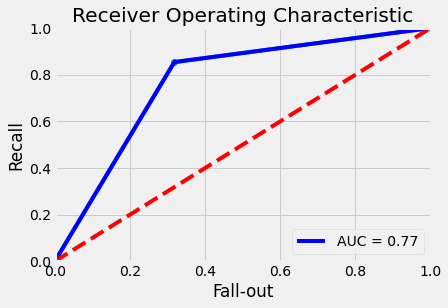

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_importance,pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,marker = 'o')
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [ ]:
overall_acc = metrics.accuracy_score(pred,y_test_importance)
print("overall accuracy: %f"%(overall_acc))
print("===========================================")
rec_for_each_class = metrics.recall_score(y_test_importance,pred,average=None)
print("recall_for_each_class:\n",rec_for_each_class)
print("===========================================")
pre_for_each_class = metrics.precision_score(y_test_importance,pred,average=None)
print("precision_for_each_class:\n",pre_for_each_class)
print("===========================================")
f1_micro_for_each_class=metrics.f1_score(y_test_importance,pred,average='micro')
print("f1_micro_each_class:\n",f1_micro_for_each_class)
print("===========================================")
f1_macro_for_each_class=metrics.f1_score(y_test_importance,pred,average='macro')
print("f1_macro_each_class:\n",f1_macro_for_each_class)
print("===========================================")
avg_recall = np.mean(rec_for_each_class)
print("average_recall:\n",avg_recall)
avg_pre = np.mean(pre_for_each_class)
print("average_precision:\n",avg_pre)
avg_f1_micro=np.mean(f1_micro_for_each_class)
print("average_f1_micro:\n",avg_f1_micro)
avg_f1_macro=np.mean(f1_macro_for_each_class)
print("average_f1_macro:\n",avg_f1_macro)

overall accuracy: 0.785228
recall_for_each_class:
 [0.68196721 0.85390318]
precision_for_each_class:
 [0.75636364 0.8014736 ]
f1_micro_each_class:
 0.785227867993714
f1_macro_each_class:
 0.7720497437092264
average_recall:
 0.767935198358511
average_precision:
 0.7789186171994195
average_f1_micro:
 0.785227867993714
average_f1_macro:
 0.7720497437092264


In [ ]:
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF,predicted_sentiment
0,17,171,1,189,0,0,149.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
1,57,663,1,13,0,0,54.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
2,32,289,1,498,9,0,139.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0
3,38,1736,1,283,0,0,87.50,Good0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000,1
4,31,1732,1,186,1,0,87.50,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
35525,12,471,1,204,0,0,119.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1
35526,10,469,1,1264,1,0,149.99,Good1,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000,0
35527,21,35,1,9,0,0,149.99,Good3,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033,1


predicted 30000+ new data

In [ ]:
X_fianltest = full_final.drop(['new_topic','predicted_sentiment'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(X_fianltest)
X_finaltest = scaler.transform(X_fianltest)

In [ ]:
pd.DataFrame(X_finaltest)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.082051,0.061666,1.0,0.013775,0.000000,0.0,0.456188,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.287179,0.239091,1.0,0.000879,0.000000,0.0,0.109485,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.158974,0.104219,1.0,0.036416,1.000000,0.0,0.419693,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.189744,0.626037,1.0,0.020662,0.000000,0.0,0.228130,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.116148,0.000000
4,0.153846,0.624594,1.0,0.013555,0.111111,0.0,0.228130,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,0.041026,0.031013,1.0,0.004763,0.000000,0.0,0.711653,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35525,0.056410,0.169852,1.0,0.014874,0.000000,0.0,0.346703,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35526,0.046154,0.169131,1.0,0.092541,0.111111,0.0,0.456188,0.000000,0.0,0.000000,0.000000,0.000000,0.037840,0.000000,0.000000
35527,0.102564,0.012622,1.0,0.000586,0.000000,0.0,0.456188,0.169323,0.0,0.000199,0.000059,0.182496,0.007336,0.000062,0.000053


In [ ]:
y_test_final = importance_model.predict(X_finaltest, num_iteration = importance_model.best_iteration)
pred = [1 if x>0.5 else 0 for x in y_test_final]

In [ ]:
full_final_importance=full_final
full_final_importance['predicted_importance']=pred
model_importance = full_final_importance['predicted_importance']
full_final_importance

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF,predicted_sentiment,predicted_importance
0,17,171,1,189,0,0,149.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
1,57,663,1,13,0,0,54.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
2,32,289,1,498,9,0,139.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0
3,38,1736,1,283,0,0,87.50,Good0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000,1,0
4,31,1732,1,186,1,0,87.50,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,1
35525,12,471,1,204,0,0,119.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
35526,10,469,1,1264,1,0,149.99,Good1,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000,0,0
35527,21,35,1,9,0,0,149.99,Good3,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033,1,1


In [ ]:
model_importance

0        0
1        0
2        0
3        0
4        0
        ..
35524    1
35525    0
35526    0
35527    1
35528    1
Name: predicted_importance, Length: 35529, dtype: int64

**Topic Prediction: Netural Network is the best**

In [ ]:
# Import topic training data

link = 'https://drive.google.com/open?id=1DOnZi0N1ieYu8Oo1UrmlRmIiB4n1BVpP'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('topic_training_data.csv') 
topic_df  = pd.read_csv('topic_training_data.csv')
topic_df.shape


GoogleDriveFile({'id': '1DOnZi0N1ieYu8Oo1UrmlRmIiB4n1BVpP'})


(19088, 17)

In [ ]:
topic_df

,Unnamed: 0,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,0,22,1752,1,574,0,0,87.50,Good0,0.043381,0.0,0.000166,0.125294,0.187101,0.000000,0.000053,0.000000
1,1,11,260,1,1914,9,0,149.99,Bad3,0.000108,0.0,0.000000,0.053289,0.000000,0.000000,0.000000,0.000000
2,2,14,476,1,454,0,0,69.99,Good1,0.000000,0.0,0.166746,0.000000,0.042273,0.196905,0.123445,0.000000
3,3,10,576,1,117,0,0,54.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,17,247,1,23,0,0,54.99,Good3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,19083,11,354,1,109,1,0,219.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,19084,26,317,1,137,0,0,69.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,19085,20,274,1,525,0,0,119.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,19086,33,1309,1,91,0,0,169.00,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
topic_df = topic_df.drop('Unnamed: 0',axis =1)
topic_df

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,22,1752,1,574,0,0,87.50,Good0,0.043381,0.0,0.000166,0.125294,0.187101,0.000000,0.000053,0.000000
1,11,260,1,1914,9,0,149.99,Bad3,0.000108,0.0,0.000000,0.053289,0.000000,0.000000,0.000000,0.000000
2,14,476,1,454,0,0,69.99,Good1,0.000000,0.0,0.166746,0.000000,0.042273,0.196905,0.123445,0.000000
3,10,576,1,117,0,0,54.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17,247,1,23,0,0,54.99,Good3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,26,317,1,137,0,0,69.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,20,274,1,525,0,0,119.99,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,33,1309,1,91,0,0,169.00,Good4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
y_topic = topic_df['new_topic']

X_topic= topic_df.drop(columns = ['new_topic'], axis = 1)

In [ ]:
# Test train data split for modeling, stratify = topic
X_train, X_test, y_train_topic, y_test_topic = train_test_split(X_topic, y_topic, train_size = 0.8,
                                                         stratify = y_topic, random_state = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(15270, 15)

In [ ]:
from tensorflow.python.keras.utils import np_utils

In [ ]:
from keras.utils.np_utils import *
#类别向量定义
b = [0,1,2,3,4,5,6,7,8]
#调用to_categorical将b按照9个类别来进行转换
b = to_categorical(b, 9)
print(b)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
y_train_new = []
for i in y_train_topic:
  if i =='Bad0':
    y_train_new.append(0)
  if i =='Bad1':
    y_train_new.append(1)
  if i =='Bad2':
    y_train_new.append(2)
  if i =='Bad3':
    y_train_new.append(3)
  if i =='Bad4':
    y_train_new.append(4)
  if i =='Good0':
    y_train_new.append(5)
  if i =='Good1':
    y_train_new.append(6)
  if i =='Good2':
    y_train_new.append(7)
  if i =='Good3':
    y_train_new.append(8)
  if i =='Good4':
    y_train_new.append(9)

print(y_train_new)


[5, 9, 4, 8, 8, 5, 9, 3, 9, 9, 5, 8, 7, 8, 6, 8, 4, 9, 8, 9, 9, 9, 8, 4, 7, 4, 9, 5, 5, 8, 9, 8, 9, 7, 5, 4, 9, 5, 5, 6, 8, 8, 6, 6, 6, 7, 7, 8, 3, 5, 9, 5, 9, 0, 9, 7, 9, 9, 5, 6, 9, 9, 6, 9, 9, 4, 4, 7, 6, 8, 8, 5, 8, 5, 5, 6, 7, 8, 9, 9, 5, 7, 9, 5, 7, 9, 5, 5, 9, 3, 8, 7, 9, 8, 7, 6, 5, 7, 4, 8, 6, 6, 6, 5, 8, 9, 6, 7, 9, 8, 4, 5, 6, 0, 9, 4, 8, 7, 8, 9, 9, 6, 6, 9, 5, 0, 5, 9, 8, 8, 5, 5, 7, 6, 4, 5, 7, 4, 6, 8, 9, 0, 8, 6, 7, 7, 9, 7, 0, 6, 6, 6, 4, 9, 5, 9, 1, 5, 5, 3, 4, 5, 4, 0, 9, 9, 3, 7, 7, 6, 9, 9, 8, 9, 4, 4, 7, 7, 9, 8, 7, 9, 5, 9, 9, 5, 5, 1, 6, 7, 9, 7, 7, 6, 9, 8, 8, 8, 9, 9, 5, 8, 8, 7, 4, 5, 6, 5, 7, 8, 6, 6, 9, 6, 8, 5, 6, 5, 7, 7, 1, 9, 7, 9, 1, 5, 8, 4, 3, 9, 7, 7, 6, 4, 3, 9, 9, 5, 6, 5, 5, 6, 3, 9, 7, 5, 9, 8, 8, 5, 9, 5, 6, 6, 5, 9, 9, 7, 9, 9, 7, 8, 4, 8, 5, 9, 9, 4, 4, 9, 9, 4, 4, 9, 8, 9, 4, 6, 6, 4, 9, 7, 6, 7, 9, 5, 4, 7, 6, 4, 6, 5, 5, 9, 6, 9, 9, 9, 5, 6, 6, 5, 9, 1, 8, 5, 5, 0, 5, 6, 8, 5, 9, 4, 5, 4, 4, 6, 6, 9, 2, 4, 6, 8, 9, 9, 4, 7, 9, 5, 8, 5, 7, 

In [ ]:
y_test_topic

11976     Bad4
12012    Good2
10692    Good0
13949    Good4
11836    Good4
         ...  
7929     Good1
2544      Bad4
7421     Good4
6776      Bad3
13039    Good0
Name: new_topic, Length: 3818, dtype: object

In [ ]:
y_test_new = []
for i in y_test_topic:
  if i =='Bad0':
    y_test_new.append(0)
  if i =='Bad1':
    y_test_new.append(1)
  if i =='Bad2':
    y_test_new.append(2)
  if i =='Bad3':
    y_test_new.append(3)
  if i =='Bad4':
    y_test_new.append(4)
  if i =='Good0':
    y_test_new.append(5)
  if i =='Good1':
    y_test_new.append(6)
  if i =='Good2':
    y_test_new.append(7)
  if i =='Good3':
    y_test_new.append(8)
  if i =='Good4':
    y_test_new.append(9)

print(y_test_new)


[4, 7, 5, 9, 9, 6, 8, 9, 6, 9, 9, 1, 4, 5, 7, 5, 6, 4, 8, 0, 8, 8, 9, 5, 9, 6, 6, 9, 4, 9, 6, 9, 0, 9, 6, 5, 0, 6, 6, 4, 9, 4, 9, 8, 4, 1, 4, 9, 9, 9, 4, 0, 2, 2, 9, 2, 9, 9, 7, 9, 2, 9, 9, 4, 1, 1, 9, 5, 8, 5, 5, 9, 5, 6, 9, 7, 4, 8, 9, 5, 3, 9, 8, 7, 4, 5, 7, 9, 9, 6, 4, 6, 9, 9, 5, 8, 6, 3, 8, 6, 9, 7, 1, 5, 1, 9, 0, 7, 8, 9, 9, 5, 3, 9, 6, 8, 5, 9, 9, 9, 6, 6, 7, 4, 8, 5, 7, 9, 1, 9, 9, 8, 3, 9, 7, 1, 5, 3, 9, 6, 0, 9, 9, 7, 8, 7, 9, 9, 7, 9, 5, 9, 7, 6, 8, 6, 6, 9, 9, 9, 5, 8, 5, 9, 9, 5, 9, 7, 5, 0, 1, 5, 3, 8, 9, 4, 5, 8, 3, 9, 9, 9, 6, 1, 3, 8, 7, 5, 9, 8, 8, 4, 9, 8, 8, 7, 6, 7, 5, 8, 9, 9, 4, 9, 5, 0, 3, 7, 9, 6, 9, 0, 4, 5, 3, 8, 0, 8, 9, 9, 9, 9, 9, 9, 5, 1, 4, 9, 6, 0, 5, 9, 9, 9, 5, 5, 7, 4, 1, 6, 9, 9, 5, 8, 8, 7, 3, 9, 5, 1, 7, 6, 9, 9, 9, 6, 5, 9, 9, 0, 9, 7, 8, 9, 9, 9, 9, 5, 7, 9, 9, 8, 9, 4, 9, 6, 5, 6, 5, 5, 9, 8, 8, 9, 9, 9, 9, 5, 5, 1, 4, 6, 8, 6, 8, 9, 4, 9, 9, 4, 1, 5, 7, 9, 9, 1, 5, 7, 9, 9, 6, 7, 8, 8, 1, 9, 9, 6, 9, 8, 0, 7, 8, 9, 4, 9, 8, 7, 6, 4, 3, 5, 4, 

In [ ]:
y_train_new = to_categorical(y_train_new,10)
y_test_new = to_categorical(y_test_new,10)

In [ ]:
import tensorflow

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [ ]:
model = Sequential()
model.add(Dense(64,input_dim=15,activation='relu',kernel_initializer = 'random_uniform'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy',f1_m,precision_m, recall_m])
#model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy',precision_m, recall_m])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1024      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, mode='auto')

In [ ]:
A = [9,5,6,8,7,4,0,1,3,2]
B = [4.817034700315458, 3.4314606741573033, 3.248936170212766, 2.982421875, 0.990914990266061, 0.9437577255871447, 0.870581527936146, 0.8492769744160178, 0.7199434229137199, 0.32530890498508735]
CW = dict(zip(A, B))
CW

{9: 4.817034700315458,
 5: 3.4314606741573033,
 6: 3.248936170212766,
 8: 2.982421875,
 7: 0.990914990266061,
 4: 0.9437577255871447,
 0: 0.870581527936146,
 1: 0.8492769744160178,
 3: 0.7199434229137199,
 2: 0.32530890498508735}

In [ ]:
history = model.fit(X_train,y_train_new,validation_data=(X_test,y_test_new),batch_size=64,epochs=100,callbacks=[reduce_lr],class_weight=CW)

Epoch 1/100
239/239 [==============================] - 3s 8ms/step - loss: 2.9326 - accuracy: 0.5680 - f1_m: 0.5495 - precision_m: 0.6107 - recall_m: 0.5061 - val_loss: 2.3194 - val_accuracy: 0.1469 - val_f1_m: 0.0121 - val_precision_m: 0.2431 - val_recall_m: 0.0063 - lr: 0.0100
Epoch 2/100
239/239 [==============================] - 2s 7ms/step - loss: 1.8462 - accuracy: 0.6512 - f1_m: 0.6501 - precision_m: 0.6812 - recall_m: 0.6222 - val_loss: 2.9572 - val_accuracy: 0.2203 - val_f1_m: 0.1793 - val_precision_m: 0.1994 - val_recall_m: 0.1631 - lr: 0.0100
Epoch 3/100
239/239 [==============================] - 2s 8ms/step - loss: 1.6704 - accuracy: 0.6675 - f1_m: 0.6670 - precision_m: 0.6932 - recall_m: 0.6431 - val_loss: 1.5274 - val_accuracy: 0.5327 - val_f1_m: 0.5235 - val_precision_m: 0.5762 - val_recall_m: 0.4802 - lr: 0.0100
Epoch 4/100
239/239 [==============================] - 3s 12ms/step - loss: 1.5798 - accuracy: 0.6721 - f1_m: 0.6715 - precision_m: 0.6973 - recall_m: 0.6478 - 

predicted 30000+ topic

In [ ]:
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,new_topic,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF,predicted_sentiment,predicted_importance
0,17,171,1,189,0,0,149.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
1,57,663,1,13,0,0,54.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
2,32,289,1,498,9,0,139.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0
3,38,1736,1,283,0,0,87.50,Good0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000,1,0
4,31,1732,1,186,1,0,87.50,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,1
35525,12,471,1,204,0,0,119.99,Good4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1,0
35526,10,469,1,1264,1,0,149.99,Good1,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000,0,0
35527,21,35,1,9,0,0,149.99,Good3,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033,1,1


In [ ]:
final_result = pd.DataFrame({'Text':model_subject_body,'Importance':model_importance,'Sentiment':model_sentiment,'Topic':model_pred_result})

NameError: ignored

In [ ]:
A = final_result.loc[(final_result['Importance'] == 1) & (final_result['Sentiment'] == 0) & (final_result['Topic'] == 'Bad Customer Service')
for i in final_result['Text']:
  print(i)

In [ ]:
A

In [ ]:
full_final = full_final.drop(['new_topic','predicted_sentiment','predicted_importance'],axis = 1)
full_final

KeyError: ignored

In [ ]:
scaler = MinMaxScaler()
scaler.fit(full_final)
full_final_for_use = scaler.transform(full_final)
full_final_for_use

array([[8.20512821e-02, 6.16660656e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.87179487e-01, 2.39091237e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.58974359e-01, 1.04219257e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.61538462e-02, 1.69130905e-01, 1.00000000e+00, ...,
        3.78401465e-02, 0.00000000e+00, 0.00000000e+00],
       [1.02564103e-01, 1.26217093e-02, 1.00000000e+00, ...,
        7.33574663e-03, 6.21800920e-05, 5.32284175e-05],
       [4.82051282e-01, 2.84890011e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
model.predict(full_final_for_use)

1111/1111 [==============================] - 2s 2ms/step


array([[2.3282559e-04, 3.4915566e-04, 4.0152844e-04, ..., 5.6335691e-04,
        5.2645797e-04, 9.4075441e-01],
       [1.7194878e-04, 1.9769471e-04, 2.8094734e-04, ..., 2.4273631e-04,
        6.1790738e-04, 9.6300673e-01],
       [2.1748338e-03, 1.3101450e-03, 1.6942390e-03, ..., 8.7102980e-04,
        1.6476973e-03, 7.8974682e-01],
       ...,
       [1.5820520e-02, 2.2423295e-03, 1.8424944e-03, ..., 2.2207310e-03,
        5.2220239e-03, 6.7837946e-02],
       [3.2498881e-02, 7.4012025e-04, 8.6857920e-04, ..., 8.0724526e-04,
        4.2511887e-04, 2.3835899e-04],
       [3.0433335e-03, 1.0778627e-03, 1.0652407e-03, ..., 7.8478723e-04,
        1.9330523e-03, 8.1928223e-01]], dtype=float32)

In [ ]:
model.predict(full_final_for_use)[0]

1111/1111 [==============================] - 2s 2ms/step


array([2.3282559e-04, 3.4915566e-04, 4.0152844e-04, 4.6885241e-04,
       5.4194234e-02, 5.6061923e-04, 1.9484659e-03, 5.6335691e-04,
       5.2645797e-04, 9.4075441e-01], dtype=float32)

In [ ]:
[2.3021187e-04, 2.7669009e-04, 3.5001995e-04, 3.7876150e-04,
       5.0179482e-02, 7.1801763e-04, 2.1468352e-03, 4.5091545e-04,
       6.6237850e-04, 9.4460660e-01]

[0.00023021187,
 0.00027669009,
 0.00035001995,
 0.0003787615,
 0.050179482,
 0.00071801763,
 0.0021468352,
 0.00045091545,
 0.0006623785,
 0.9446066]

In [ ]:
np.argmax([2.3021187e-04, 2.7669009e-04, 3.5001995e-04, 3.7876150e-04,
       5.0179482e-02, 7.1801763e-04, 2.1468352e-03, 4.5091545e-04,
       6.6237850e-04, 9.4460660e-01])

9

In [ ]:
model_pred_num = [np.argmax(i) for i in model.predict(full_final_for_use)]

1111/1111 [==============================] - 2s 2ms/step


In [ ]:
model_pred_result = []
for i in model_pred_num:
  if i == 0:
    model_pred_result.append('Short Battery Life')
  if i == 1:
    model_pred_result.append('Tech Issues')
  if i == 2:
    model_pred_result.append('Bad Customer Service')
  if i == 3:
    model_pred_result.append('Charging Problem')
  if i == 4:
    model_pred_result.append('Bad General')
  if i == 5:
    model_pred_result.append('Functionality')
  if i == 6:
    model_pred_result.append('Cost Efficient')
  if i == 7:
    model_pred_result.append('User Friendly')
  if i == 8:
    model_pred_result.append('Long Battery Life')
  if i == 9:
    model_pred_result.append('Good General')
model_pred_result

['Good General',
 'Good General',
 'Good General',
 'User Friendly',
 'Good General',
 'User Friendly',
 'Good General',
 'Good General',
 'Good General',
 'Functionality',
 'Good General',
 'Good General',
 'Good General',
 'User Friendly',
 'Good General',
 'Cost Efficient',
 'Functionality',
 'Long Battery Life',
 'Cost Efficient',
 'Long Battery Life',
 'Cost Efficient',
 'User Friendly',
 'Good General',
 'User Friendly',
 'Long Battery Life',
 'Cost Efficient',
 'Good General',
 'Good General',
 'Cost Efficient',
 'Good General',
 'User Friendly',
 'Cost Efficient',
 'Good General',
 'Good General',
 'Good General',
 'Good General',
 'Good General',
 'User Friendly',
 'Functionality',
 'Long Battery Life',
 'Cost Efficient',
 'Long Battery Life',
 'Functionality',
 'Good General',
 'Cost Efficient',
 'Long Battery Life',
 'Good General',
 'Long Battery Life',
 'Long Battery Life',
 'Good General',
 'Good General',
 'Good General',
 'Functionality',
 'Cost Efficient',
 'Long Batte

In [ ]:
full_final_topic = full_final
full_final_topic['Predicted Topic'] = model_pred_result
full_final_topic

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF,Predicted Topic
0,17,171,1,189,0,0,149.99,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Good General
1,57,663,1,13,0,0,54.99,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Good General
2,32,289,1,498,9,0,139.99,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Good General
3,38,1736,1,283,0,0,87.50,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.067390,0.000000,User Friendly
4,31,1732,1,186,1,0,87.50,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Good General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,9,86,1,66,0,0,219.99,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Good General
35525,12,471,1,204,0,0,119.99,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Good General
35526,10,469,1,1264,1,0,149.99,0.000000,0.0,0.000000,0.00000,0.000000,0.054915,0.000000,0.000000,Cost Efficient
35527,21,35,1,9,0,0,149.99,0.279352,0.0,0.000166,0.00021,0.235401,0.010646,0.000036,0.000033,Functionality


In [ ]:
final_result

NameError: ignored

In [175]:
final_result = pd.DataFrame({'Text':model_subject_body,'Importance':model_importance,'Sentiment':model_sentiment,'Topic':model_pred_result})
final_result['Raw Text'] = Texts

In [176]:
final_result_filter = final_result.loc[(final_result['Importance']==1)&(final_result['Sentiment']==0)&(final_result['Topic']=='Bad Customer Service') ]
final_result_filter

,Text,Importance,Sentiment,Topic,Raw Text
685,childrens tablet well excite upgrade tablet re...,1,0,Bad Customer Service,"Fine device, TOO many ads https://www.amazon.c..."
3816,disappoint although love old fire one good fir...,1,0,Bad Customer Service,Granddaughter was in love with it Grandaughter...
4957,leave something desire careful choose lock scr...,1,0,Bad Customer Service,Another kindle My 3rd kindle....power cord sho...
6709,unfortunate word think think product whole unf...,1,0,Bad Customer Service,Perfect for kids! Must have for busy toddlers ...
6762,great update fire line fire plus great complem...,1,0,Bad Customer Service,Battery life I like everything about tablet me...
14283,could recommend ca say really happy purchase f...,1,0,Bad Customer Service,Okay at best Wish it had a screen lock. Also ...
15608,make sure product work sell buy fire generatio...,1,0,Bad Customer Service,My third one I must be really tough on my Kind...
17816,waste money need new old ipad longer update ap...,1,0,Bad Customer Service,Very touchy on touch screen The screen quality...
22549,flicker screen unresponsive touch screen frust...,1,0,Bad Customer Service,Nice tablet for watching movies It has all bas...
26108,worth im week outside return option scam cours...,1,0,Bad Customer Service,"Nice size, not too big, not too small. I purch..."


Fine device, TOO many ads https://www.amazon.com/dp/B01J94YIT6/ref=cm_cr_ryp_prd_ttl_sol_0
It is OK. I had a 2015, that Amazon bricked when I installed the Google Play store. This one is much nicer, and I won't be installing the Google Play Store on this one. It seems zippier than last years model. And I really like that I can install micro SDHC cards. Normally I would have given this 5 stars, but the ads are overpowering. Along with many useless apps. I enjoy the Amazon infrastructure, and is one of the reason I buy Amazon devices. I liked most of the ads on the 2015 version. They were for products I like. Sometimes when I shut the display down, it turns back on to deliver ads. I've gotten full page ads when I'm surfing, or reading emails. The ads are not just intrusive, they are aggressive and overpowering. This is the ONLY drawback I have found. I guess I'll have to pay to remove the ads, which I wouldn't do if they weren't so obnoxious.
---
Granddaughter was in love with it Grandau

In [ ]:
disappoint although love old fire one good first touch screen sensitive old model frequently try select link ignores selection resort laptop simple search normally use second visually new old model however new model slightly square old model fit inch cover also butter center instead low corner use handy gooseneck stand hold carpel tunnel issue flair new design put power button right clamp third although password favorite etc old default new one many try research item manually add new take long trade expire money somewhat annoyed reason physical redesign unless goal force everyone buy new cover accessories one die probably spend extra buck get ipad something


In [ ]:
for_use = 